Wollastonite is a high-temperature calcium-silicate, $\beta−\text{Ca}_3\text{Si}_3\text{O}_9$, with three distinct
$^{29}\text{Si}$ sites. The $^{29}\text{Si}$ tensor parameters
 were obtained from Hansen `et al.` [#f1]_

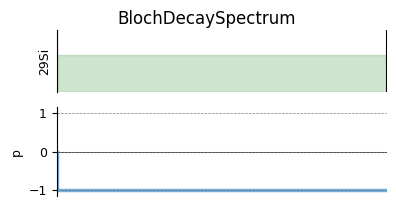

In [6]:

import matplotlib.pyplot as plt

from mrsimulator import Simulator, SpinSystem, Site
from mrsimulator import signal_processor as sp
from mrsimulator.method.lib import BlochDecaySpectrum
from mrsimulator.spin_system.tensors import SymmetricTensor
from mrsimulator.method import SpectralDimension

# sphinx_gallery_thumbnail_number = 3

# %%
# Create sites and spin systems. We create three single-site spin systems for
# better performance.
Si29_1 = Site(
    isotope="29Si",
    isotropic_chemical_shift=-89.0,  # in ppm
    shielding_symmetric=SymmetricTensor(zeta=59.8, eta=0.62),  # zeta in ppm
)
Si29_2 = Site(
    isotope="29Si",
    isotropic_chemical_shift=-89.5,  # in ppm
    shielding_symmetric=SymmetricTensor(zeta=52.1, eta=0.68),  # zeta in ppm
)
Si29_3 = Site(
    isotope="29Si",
    isotropic_chemical_shift=-87.8,  # in ppm
    shielding_symmetric=SymmetricTensor(zeta=69.4, eta=0.60),  # zeta in ppm
)

spin_systems = [
    SpinSystem(sites=[Si29_1]),
    SpinSystem(sites=[Si29_2]),
    SpinSystem(sites=[Si29_3]),
]

# %%
# Create a Bloch decay spectrum method.
method = BlochDecaySpectrum(
    channels=["29Si"],
    magnetic_flux_density=14.1,  # in T
    rotor_frequency=1500,  # in Hz
    spectral_dimensions=[
        SpectralDimension(
            count=2048,
            spectral_width=25000,  # in Hz
            reference_offset=-10000,  # in Hz
            label=r"$^{29}$Si resonances",
        )
    ],
)

# A graphical representation of the method object.
plt.figure(figsize=(4, 2))
method.plot()
plt.show()

# %%
# Create the Simulator object and add method and spin system objects, and run.
sim = Simulator(spin_systems=spin_systems, methods=[method])

# %%
# Simulate the spectrum.
sim.run()

processor = sp.SignalProcessor(
    operations=[sp.IFFT(), sp.apodization.Exponential(FWHM="70 Hz"), sp.FFT()]
)
processed_dataset = processor.apply_operations(dataset=sim.methods[0].simulation)

In [7]:
from ase.io import read
from soprano.properties.nmr import get_spin_system
from soprano.selection import AtomSelection

atoms = read("../example_data/wollastonite/nmr/wollastonite.magres")
atoms = AtomSelection.unique(atoms).subset(atoms)

In [8]:
isotopes={"Si": 29}
refs = {"Si": 369} # in ppm
gradients = {"Si": -1.0}
include_shielding = True
include_efg = False


selSi1 = AtomSelection.from_selection_string(atoms, "Si3")
Si29_1 = get_spin_system(
    selSi1.subset(atoms),
    isotopes=isotopes,
    references=refs,
    gradients=gradients,
    include_shielding=include_shielding,
    include_efg=include_efg,
    )

selSi2 = AtomSelection.from_selection_string(atoms, "Si4")
Si29_2 = get_spin_system(
    selSi2.subset(atoms),
    isotopes=isotopes,
    references=refs,
    gradients=gradients,
    include_shielding=include_shielding,
    include_efg=include_efg,
    )

selSi3 = AtomSelection.from_selection_string(atoms, "Si5")
Si29_3 = get_spin_system(
    selSi3.subset(atoms),
    isotopes=isotopes,
    references=refs,
    gradients=gradients,
    include_shielding=include_shielding,
    include_efg=include_efg,
    )
spin_systems = [Si29_1.to_mrsimulator(), Si29_2.to_mrsimulator(), Si29_3.to_mrsimulator()]

In [9]:
spin_systems

[{'sites': [{'isotope': '29Si',
    'label': 'Si3',
    'isotropic_chemical_shift': -87.46344378160333,
    'shielding_symmetric': {'zeta': -98.75203871128781,
     'eta': 0.5674740348694309,
     'alpha': 0.020166615757606365,
     'beta': 0.94651704197446,
     'gamma': 1.5156736311136414}}],
  'couplings': []},
 {'sites': [{'isotope': '29Si',
    'label': 'Si4',
    'isotropic_chemical_shift': -89.06271973924045,
    'shielding_symmetric': {'zeta': -80.98194072219098,
     'eta': 0.5850514476913437,
     'alpha': 5.8295164419486385,
     'beta': 0.24082908936704328,
     'gamma': 2.244828191477996}}],
  'couplings': []},
 {'sites': [{'isotope': '29Si',
    'label': 'Si5',
    'isotropic_chemical_shift': -89.43056586039503,
    'shielding_symmetric': {'zeta': -71.25858386098747,
     'eta': 0.6841971269859698,
     'alpha': 0.27363500751334335,
     'beta': 0.2933326013195341,
     'gamma': 1.058611478517645}}],
  'couplings': []}]

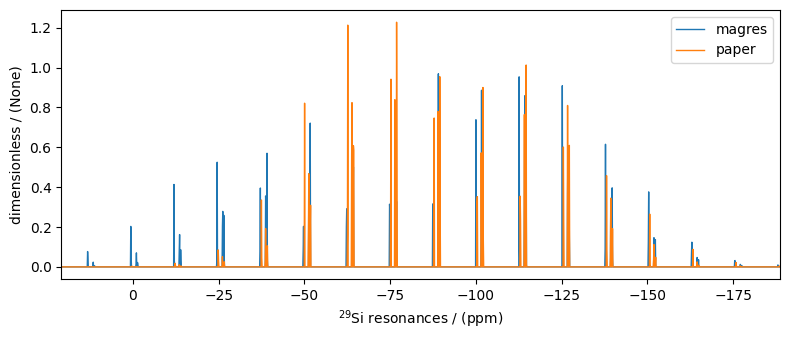

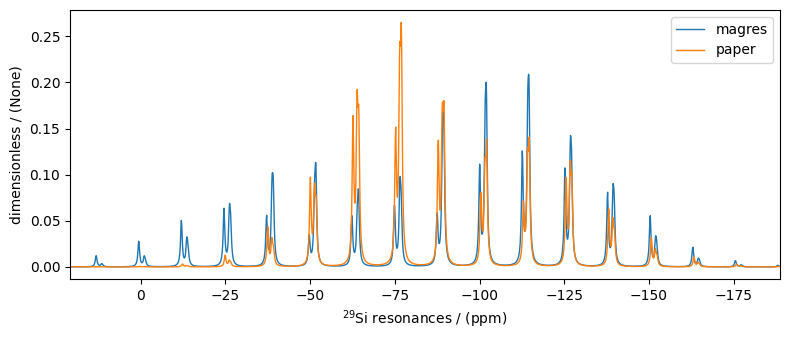

In [10]:
# %%
# Create the Simulator object and add method and spin system objects, and run.
sim_magres = Simulator(spin_systems=spin_systems, methods=[method])

# %%
# Simulate the spectrum.
sim_magres.run()

# The plot of the simulation before signal processing.
plt.figure(figsize=(8, 3.5))
ax = plt.subplot(projection="csdm")
ax.plot(sim_magres.methods[0].simulation.real, color="C0", linewidth=1, label="magres")
ax.plot(sim.methods[0].simulation.real, color="C1", linewidth=1, label="paper")
ax.invert_xaxis()
plt.legend()
plt.tight_layout()
plt.show()

# Add post-simulation signal processing.
processed_dataset_magres = processor.apply_operations(dataset=sim_magres.methods[0].simulation)

# The plot of the simulation after signal processing.
plt.figure(figsize=(8, 3.5))
ax = plt.subplot(projection="csdm")
ax.plot(processed_dataset_magres.real, color="C0", linewidth=1, label="magres")
ax.plot(processed_dataset.real, color="C1", linewidth=1, label="paper")
ax.invert_xaxis()
plt.legend()
plt.tight_layout()
plt.show()